
**Business Problem**

The Management team at e-commerce wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('MaskedURL')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Understanding data**

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df.describe().drop(['User_ID','Occupation','Marital_Status'],axis=1)

,Product_Category,Purchase
count,550068.000000,550068.000000
mean,5.404270,9263.968713
std,3.936211,5023.065394
min,1.000000,12.000000
25%,1.000000,5823.000000
50%,5.000000,8047.000000
75%,8.000000,12054.000000
max,20.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

This implies that there are no null values present in the data set.Hence no Null Data treatment is required.

# **Outlier Checks**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


There can only be outlier in Pruchase feature.
Purchase is a continous feature.

In [ ]:
# df['Purchase'].quantile()
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

Outlier Removal using IQR

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df=df[(df['Purchase']<Q3+1.5*IQR) & (df['Purchase']>Q1-1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


# **Exploratory Data Analysis**

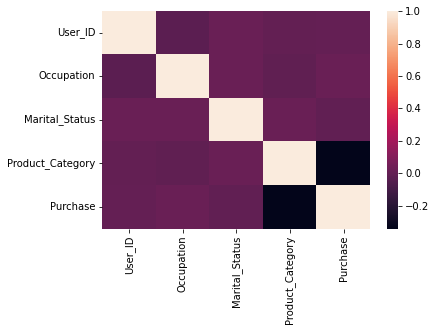

In [ ]:
sns.heatmap(df.corr())

We can make out from the Correlation Heatmap that none of the features are correlated.So none of the features can be removed.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **UNIVARIATE ANALYSIS**

In [ ]:
df['Age'].value_counts()

26-35    217200
36-45    108583
18-25     98590
46-50     45066
51-55     37857
55+       21059
0-17      14883
Name: Age, dtype: int64

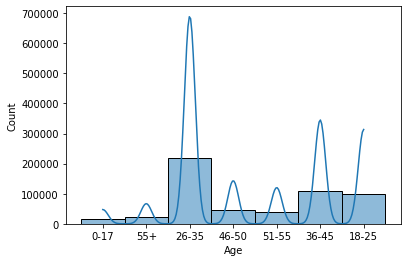

In [ ]:
sns.histplot(df['Age'],kde=True)

**ANALYSIS**- Most of the people that buy products on black friday are in the age group of 26-35 followed by 36-45 and then 18-25.

**RECOMMENDATIONS**- So Market campaigns should run more for people who are in age range of 26-35

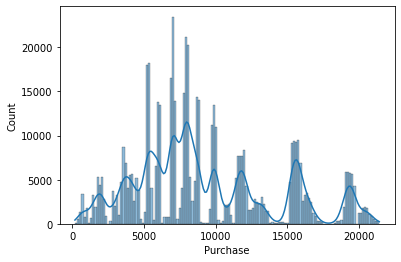

In [ ]:
# sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(df['Purchase'],kde=True)

**ANALYSIS**- Most of the people have spent nearly 8k for purchase.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


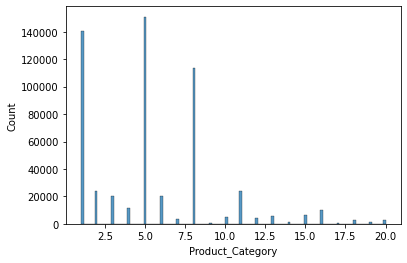

In [ ]:
sns.histplot(df['Product_Category'])

**ANALYSIS**- Widely purchased product category is 5 followed by 1 and then 8

## **BIVARIATE ANALYSIS**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


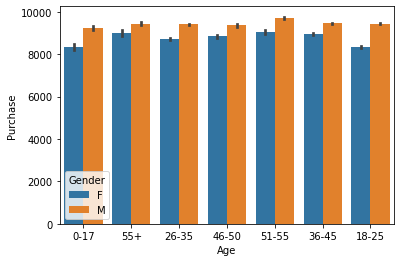

In [ ]:
sns.barplot(df['Age'],df['Purchase'],hue=df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


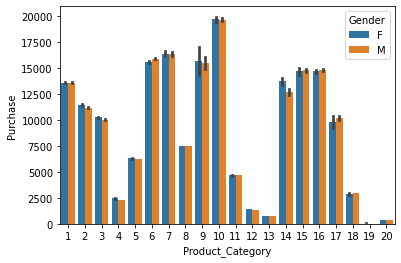

In [ ]:
sns.barplot(df['Product_Category'],df['Purchase'],hue=df['Gender'])

In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


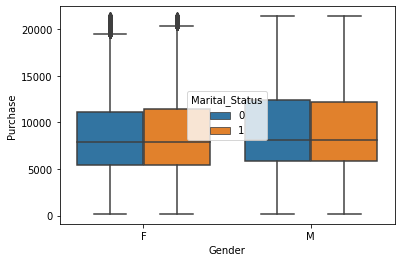

In [ ]:
sns.boxplot(df['Gender'],df['Purchase'],hue=df['Marital_Status'])

**ANALYSIS** - 1.Here we can see that median amount spent by males and females are mostly equal while in comparison men have spent more than females.


2.Martial Status has no impact on the spending patterns,so can be dropped from further analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


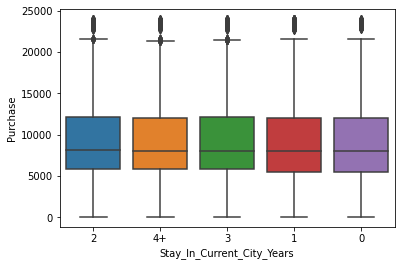

In [ ]:
sns.boxplot(df['Stay_In_Current_City_Years'],df['Purchase'])

**ANALYSIS**- Here we can see that on an average median spend across all the stay in current city years is same.

So, we can conclude that **Purchase is independent of Stay in current city feature.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


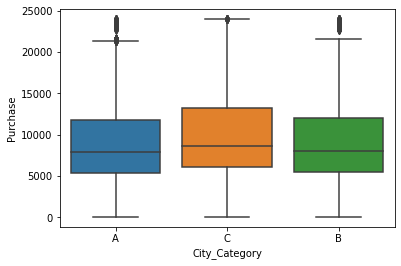

In [ ]:
sns.boxplot(df['City_Category'],df['Purchase'])

**ANALYSIS**- Here we can see that people with **City Category of 'C' spend more** than people of city category 'A' and 'B'.

In [ ]:
df.drop(['Marital_Status'],axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,3,8370
1,1000001,P00248942,F,0-17,10,A,2,1,15200
2,1000001,P00087842,F,0-17,10,A,2,12,1422
3,1000001,P00085442,F,0-17,10,A,2,12,1057
4,1000002,P00285442,M,55+,16,C,4+,8,7969
...,...,...,...,...,...,...,...,...,...
545910,1006040,P00184342,M,26-35,6,B,2,8,9855
545911,1006040,P00193142,M,26-35,6,B,2,5,1962
545912,1006040,P00029842,M,26-35,6,B,2,8,7852
545913,1006040,P00106042,M,26-35,6,B,2,5,7159


In [ ]:
(df.groupby('Product_ID')['Purchase'].sum()).sort_values(ascending=False)

Product_ID
P00025442    27995166
P00110742    26722309
P00255842    25168963
P00059442    24338343
P00184942    24334887
               ...   
P00012942        1717
P00325342        1656
P00353042        1545
P00309042         726
P00091742         405
Name: Purchase, Length: 3626, dtype: int64

**ANALYSIS** -We can conclude here that most amount is spent on Product ID-P00025442 followed by P00110742     

In [ ]:
(df.groupby('User_ID')['Purchase'].sum()).sort_values(ascending=False)

User_ID
1004277    10421933
1001680     8652553
1002909     7418740
1001941     6817493
1005831     6489130
             ...   
1004991       52371
1005117       49668
1000094       49288
1003883       49104
1004464       46091
Name: Purchase, Length: 5891, dtype: int64

**ANALYSIS** -Most amount is spent by user with id 1004277 followed by 1001680.


In [ ]:
user_item_purchase=(df.groupby('User_ID')['Product_ID'].count())

In [ ]:
# (df[df['User_ID']==1000001]).info()

In [ ]:
user_item_purchase

User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Name: Product_ID, Length: 5891, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


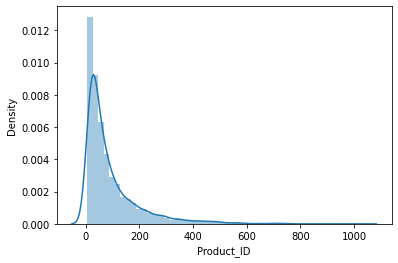

In [ ]:
sns.distplot(user_item_purchase)

The distribution is RIGHT SKEWED meaning people are not buying more than 100 products generally.

**ANALYSIS**-Most of the people have purchased less than 50 products.

In [ ]:
df_new=(df.groupby('User_ID')['Purchase'].mean()).sort_values(ascending=False)

In [ ]:
df_new.mean()


9568.839913558906

In [ ]:
df_new.std()


1890.0871054373001

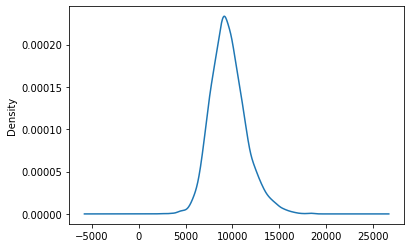

In [ ]:
df_new.plot.density()

QQ-PLOT TEST FOR GAUSSIAN DISTRIBUTION

((array([-3.67773931, -3.44494532, -3.31676714, ...,  3.31676714,
          3.44494532,  3.67773931]),
  array([ 2318.73333333,  2698.35714286,  3421.52173913, ...,
         18345.94444444, 18490.16666667, 18577.89361702])),
 (1874.474311554712, 9568.839913558928, 0.9912525836519839))

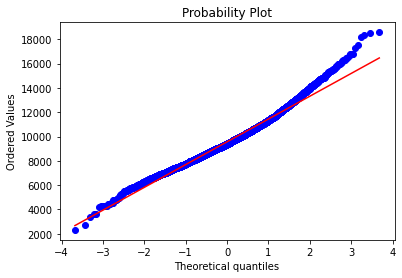

In [ ]:
#qq-plot for verifying that df_new is a guassian distribution
fig, ax = plt.subplots()
stats.probplot(df_new, dist="norm", plot=ax)

**ANALYSIS** -Mean amount spent by all user is nearly normally distributed but not exactly.

**OBSERVATION**- Most of the people have spent 10k USD with standard deviation around 1.9k USD.

# **CENTRAL LIMIT THEOREM - USE CASE IMPLEMENTATION**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


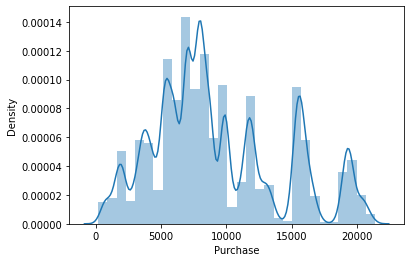

In [ ]:
sns.distplot(df['Purchase'],bins=30)

In [ ]:
sampleMeans = []
for _ in range(1000):
    samples = df['Purchase'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


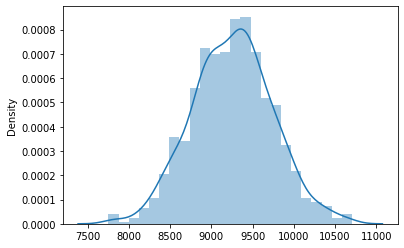

In [ ]:
sns.distplot(sampleMeans)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

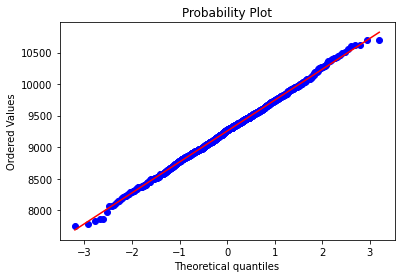

In [ ]:
#qq-plot for verifying that df_new is a guassian distribution
fig, ax = plt.subplots()
stats.probplot(sampleMeans, dist="norm", plot=ax)

**ANALYSIS**- QQ-Plot shows that sample means of population follows Gaussian Distribution.

***Thus verifying Central Limit Therom(CLT)***

In [ ]:
sm=np.mean(sampleMeans)
sstd=np.std(sampleMeans)
#95% Confidence Interval is 2standard deviations away
f_interval_val=sm-2*sstd
s_interval_val=sm+2*sstd
print("95% Confidence Interval [ {} - {} ]".format(f_interval_val,s_interval_val))
#99% Confidence Interval is 3standard deviations away
f_interval_val=sm-3*sstd
s_interval_val=sm+3*sstd
print("99% Confidence Interval [ {} - {} ]".format(f_interval_val,s_interval_val))

95% Confidence Interval [ 8278.75443307496 - 10232.504566925038 ]
99% Confidence Interval [ 7790.3168996124405 - 10720.942100387558 ]


**ANALYSIS**- Here we can conclude that we are **95% sure** that Purchase Amount will fall in the range between **8278 and 10232.**

Here we can conclude that we are **99% sure** that Purchase Amount will fall in the range between **7790 and 10720.**

**AS THE CONFIDENCE INTERVAL RANGE INCREASES, THE PURCHASE AMOUNT RATE AS INCREASES.**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
f_cutomers_df=df[df['Gender']=='F']

In [ ]:
m_cutomers_df=df[df['Gender']=='M']

**CLT for Female Customers**

In [ ]:
#For female customers
sampleMeans = []
for _ in range(1000):
    samples = f_cutomers_df['Purchase'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

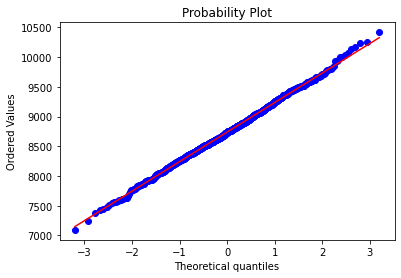

In [ ]:
fig, ax = plt.subplots()
stats.probplot(sampleMeans, dist="norm", plot=ax)

In [ ]:
sm=np.mean(sampleMeans)
sstd=np.std(sampleMeans)
#95% Confidence Interval is 2standard deviations away
f_interval_val=sm-2*sstd
s_interval_val=sm+2*sstd
print("95% Confidence Interval [ {} - {} ]".format(f_interval_val,s_interval_val))
#99% Confidence Interval is 3standard deviations away
f_interval_val=sm-3*sstd
s_interval_val=sm+3*sstd
print("99% Confidence Interval [ {} - {} ]".format(f_interval_val,s_interval_val))

95% Confidence Interval [ 7746.702043964526 - 9728.882596035472 ]
99% Confidence Interval [ 7251.156905946789 - 10224.427734053208 ]


**ANALYSIS** - Here we can conclude that we are **95 % sure that female customer** will spend between **7746 and 9728**

**CLT FOR MALE CUSTOMERS**

In [ ]:
#For male customers
sampleMeans = []
for _ in range(1000):
    samples = m_cutomers_df['Purchase'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

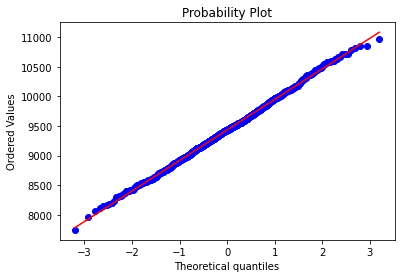

In [ ]:
fig, ax = plt.subplots()
stats.probplot(sampleMeans, dist="norm", plot=ax)

In [ ]:
sm=np.mean(sampleMeans)
sstd=np.std(sampleMeans)
#95% Confidence Interval is 2standard deviations away
f_interval_val=sm-2*sstd
s_interval_val=sm+2*sstd
print("95% Confidence Interval [ {} - {} ]".format(f_interval_val,s_interval_val))
#99% Confidence Interval is 3standard deviations away
f_interval_val=sm-3*sstd
s_interval_val=sm+3*sstd
print("99% Confidence Interval [ {} - {} ]".format(f_interval_val,s_interval_val))

95% Confidence Interval [ 8401.601312078928 - 10463.171267921072 ]
99% Confidence Interval [ 7886.208823118393 - 10978.563756881607 ]


**ANALYSIS** - Here we can conclude that we are **95 % sure that male customer** will spend between **8401 and 10463**

# **RECOMMENDATIONS:**
1.Marketing Capmaigns should be run for the people in the age group of 26-35 and least amount of can be spend to attract the people from the age bracket of 0-17.

2.Since most of the people have purchased less than 50 products,user intrest category for an item list of 50 can be defined.

3.Since male customer will spend between 8401 and 10463,advertising products of this range to the male customers will be of great help.

4.Since female customer will spend between 7746 and 9728,advertising products of this range to the female customers will be of great help.
